## Modelling hateness, offensiveness in text
### Swetha Chandrasekar
012497628 <br>
swetha.chandrasekar@sjsu.edu
### Project Alternus vera
### factor: Hatespeech, offensiveness
<h3> In this note book, for the project of Alternus vera, <br><br><br>
-> <font color=orange> In section 1, we will define and model the factor of <font color=red><u><i>hateness/offensiveness</i></u></font>.
This vector will be used in the polynomial for fake news prediction.</font> <br><br>

<font color=blue>
-> In Section 2, we will use the vector modeled after hateness and offensiveness coefficients (weights) to predict fake news.<br>
</font>
 </h3>
 
### Formal Business Problem Statement: 
"

<i><u>
Given the headline text of article can we predict the confidences of [hatespeech, offsensiveness, clean] </u></i>


# Section 1 modelling hatespeech, offensiveness
# Dataset for enrichment: hatespeech in tweets https://data.world/crowdflower/hate-speech-identification
https://aaai.org/ocs/index.php/ICWSM/ICWSM17/paper/view/15665
# Liar Liar dataset

In [87]:
import pandas as pd
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.text import *
from fastai.vision import *
from fastai.tabular import *

In [88]:
dataset = pd.read_csv('labeled_data.csv', encoding='latin1')

In [121]:
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [122]:
dataset.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [123]:
tweets = dataset[['tweet','class']]

In [124]:
tweets.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [125]:
tweets.tail()

,tweet,class
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1
24782,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,2


1430
11440


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



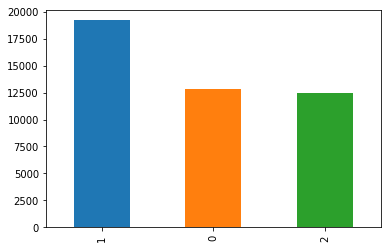

In [198]:
#1 offensive speech
#0 Offsenive and hate speech
#2 neither
tweets['label'] = tweets['class']
hate = tweets[tweets.label ==0]
neither = tweets[tweets.label == 2]
neither_text = neither.tweet.tolist()
neither_text = neither_text + neither_text 
hate_text = hate.tweet.tolist()
hate_labels = hate.label.tolist()
hate_class = hate['class'].tolist()
print (len(hate_class))
hate_text = hate_text + hate_text +hate_text +hate_text +hate_text +hate_text +hate_text +hate_text
hate_labels = hate_labels + hate_labels + hate_labels + hate_labels + hate_labels + hate_labels + hate_labels + hate_labels 
hate_class = hate_class + hate_class + hate_class + hate_class + hate_class + hate_class + hate_class + hate_class 
print (len(hate_class))

hate_df = pd.DataFrame(hate_text)
hate_df['label'] = pd.Series([0] * len(hate_text))

hate_df['class'] = pd.Series([0] * len(hate_text))
neither_df = pd.DataFrame(neither_text)
neither_df['label'] = pd.Series([2] * len(neither_text))

neither_df['class'] = pd.Series([2] * len(neither_text))
hate_df.columns=['tweet','label','class']
neither_df.columns=['tweet','label','class']

tweets1 = pd.concat([tweets,hate_df,neither_df])
tweets1.label.value_counts().plot(kind='bar')



In [130]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from fastai import *
from fastai import *
from fastai.text import *
from fastai.tabular import *
from fastai.vision import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [131]:
### performing stemming
from nltk import PorterStemmer 
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            if 'object' in token.strip() or 'dtype' in token.strip() or 'unknown' in token.strip():
                continue
            result.append(lemmatize_stemming(token))
    return result


In [132]:
processed_docs = tweets1['tweet'].map(preprocess)
processed_docs[:10]
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

0 cleaning
1 complain
2 house
3 mayasolovely
4 shouldn
5 trash
6 woman
7 cold
8 cuffin
9 dats
10 mleew


[(11, 1), (69, 1), (2169, 1)]

# Please be advised that wordcloud below contains several offensive and nasty words

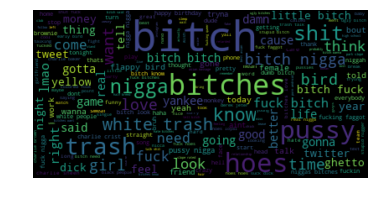

In [133]:
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = ""

for doc in processed_docs:
    text= text + " " + ' '.join(doc)
    
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Similar to the approach used in party affliation and stance detection, let us generate custom doc vectors

In [134]:
word_vector_input_dataset = tweets1.tweet.tolist()
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
data = word_vector_input_dataset
tagged_data = []
exception_count = 0
for i, _d in enumerate(data):
    try:
        tagged_data.append(TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]))
    except:
        exception_count+=1
### Train doc2vec embeddings 
print ("Total number of custom documents:",len(tagged_data))
max_epochs = 10
vec_size = 10
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=10,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("hate_offensive_speech.model")
print("Model Saved")

Total number of custom documents: 44549


/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [135]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
text = "you are such a f2#@# re@#@$$ b@#@#"
dvmodel= Doc2Vec.load("hate_offensive_speech.model") ### Using a earlier trained model d2v.model 
test_sentence= [dvmodel.infer_vector(word_tokenize(text))]
print (test_sentence)

[array([-0.312844, -0.352888, -0.34749 ,  0.138649,  0.006099, -0.190256,  0.187172, -0.211085,  0.033825,  0.16471 ],
      dtype=float32)]


# Let us use doc2vec embeddings directly as features to predict offensiveness, hateness and clean (neither hate nor offensive) using neural network

In [146]:
training_data = []
for line in data:
    training_data.append(dvmodel.infer_vector(word_tokenize(line)))

In [147]:
training_df = pd.DataFrame(training_data)

In [148]:
training_df['label'] = pd.Series(tweets1.label.tolist())

In [149]:
training_df.columns = ['0','1','2','3','4','5','6','7','8','9','label']
training_df.head()
print(len(training_df))

44549


In [150]:
path= Path()
X = training_df
### Categorical features
cat_names= []
### continuos features
cont_names = ['0','1','2','3','4','5','6','7','8','9']

test = TabularList.from_df(X.iloc[0:2500].copy(), path=path, cat_names=None, cont_names=cont_names)
df_test_copy = X.iloc[0:2500]
X.head()


,0,1,2,3,4,5,6,7,8,9,label
0,-0.387770,-0.111619,-0.073101,0.735180,0.799410,0.538635,0.768662,-0.197833,0.074071,-0.522116,2
1,-0.211562,0.120744,-0.436608,-0.035273,0.136656,0.041984,0.424928,0.086316,0.110763,0.000558,1
2,-0.739436,0.079746,-0.690327,0.108762,0.451831,-0.239758,0.538540,-0.324357,0.284701,0.241678,1
3,-0.703502,-0.273570,-0.491763,0.513453,0.776629,0.165495,0.775013,0.125146,-0.149392,0.090304,1
4,-0.184811,0.230258,-0.310367,0.198472,0.980711,-0.046712,0.727397,-0.434801,0.082696,-0.483802,1


In [151]:
path = Path()
procs = [FillMissing, Categorify, Normalize]
dep_var = 'label' # 0 means hate , 1 means offensive 2 means neither
valid_idx = list(range(0,2500))
DB = (TabularList.from_df(X, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
      .split_by_idx(valid_idx)
      .label_from_df(cols=dep_var)
      .add_test(test, label=0)
      .databunch())
DB.show_batch(rows=10)

0,1,2,3,4,5,6,7,8,9,target
0.5450,0.9602,-1.1345,-0.1253,1.0168,-0.1551,0.5842,-0.1903,1.7557,1.6383,1
0.7418,0.3542,0.0137,0.3552,-1.9975,-0.2583,-0.4117,-0.1819,-0.2676,-0.0983,1
0.1684,1.0508,0.7720,0.3600,0.8186,-0.7770,0.7942,-0.8672,0.4748,0.7307,1
1.0271,0.2611,0.4664,0.5495,-0.6656,0.6997,-1.2233,-1.6760,-0.9611,-0.5541,0
0.0691,0.4403,0.0304,0.2014,0.1803,0.1025,-0.4856,1.1182,-0.5405,-0.2497,1
-1.3731,-0.2134,0.6443,1.0072,0.4544,2.1263,0.7613,1.0334,0.8858,-0.5939,2
1.9852,2.0655,-1.2099,0.6079,-0.4713,0.4115,0.4117,0.8121,-1.0772,-0.1759,0
-0.0337,-0.1318,-0.6790,-1.3100,-2.1393,-0.2707,0.2839,0.1993,1.6921,0.4979,1
0.0152,-1.0863,-0.0880,0.4553,-0.4240,1.5269,0.0792,0.6331,-1.0055,-0.2565,0
-2.6171,0.7153,-0.3477,0.9401,1.1858,1.5712,-0.2716,-0.3510,2.0729,-0.9948,0


## Training a neural network 1 hidden layer of 10 nodes

In [152]:
learn = tabular_learner(DB, layers=[10],  metrics=accuracy,emb_drop=0.2)
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.2)
  (bn_cont): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [155]:
learn.fit_one_cycle(10,1e-1)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.865459    0.732151    0.689600  (00:03)
2      0.859957    0.706367    0.696400  (00:03)
3      0.872031    0.594974    0.748400  (00:03)
4      0.864025    0.801161    0.602800  (00:03)
5      0.872817    0.644039    0.771200  (00:03)
6      0.855773    0.663551    0.732800  (00:03)
7      0.832494    0.723736    0.692800  (00:03)
8      0.837758    0.720664    0.676000  (00:03)
9      0.825781    0.707864    0.690000  (00:03)
10     0.826985    0.706272    0.685200  (00:03)



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


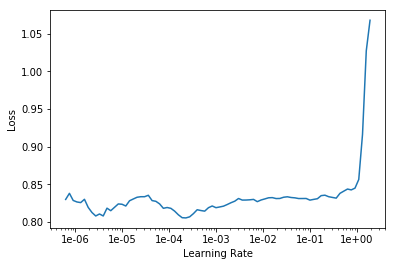

In [156]:
learn.lr_find()
learn.recorder.plot()


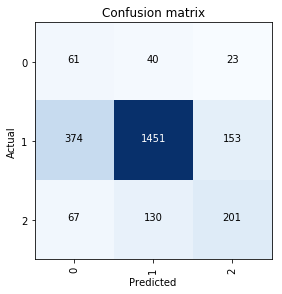

In [157]:
from fastai import *
from fastai.vision import *
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [173]:
SampleText = ["I hate this f#@# smrtphone "] ## Taken from test
a = pd.DataFrame([dvmodel.infer_vector(SampleText)])
a.columns =['0','1','2','3','4','5','6','7','8','9']
a.head()
learn.predict(a.iloc[0])

(1, tensor(1), tensor([0.1090, 0.5842, 0.3068]))

In [167]:
## This is 58% offensive  10% hate speech and 30% neither

# Section 2: Generate the vectors on LIAR LIAR training dataset so we can learn fake vs no fake news

In [169]:
import pandas as pd
headers = ['id','label','statement','subject',
           'speaker','job_title', 'state', 
           'affliation','barely_true','false',
           'half_true', 'mostly_true','pants_on_fire', 
           'venue']
print (len(headers))
liar_train_df = pd.read_csv('../train.tsv', names=headers, delimiter='\t')
liar_valid_df = pd.read_csv('../valid.tsv', names=headers, delimiter='\t')
liar_test_df = pd.read_csv('../test.tsv',names=headers, delimiter='\t')

14


In [183]:
hate_speech_vector_training_fake_news = []
statements = liar_train_df.statement.tolist()
for statement in statements:
    v = dvmodel.infer_vector(statement) ## getting the doc vector for statement LIAR LIAR tsv
    hate_speech_vector_training_fake_news.append(v)
fake_label = liar_train_df.label.tolist()
label = []
for l in fake_label:
    if 'barely_true' in l or 'false' in l:
        label.append(0)
    else:
        label.append(1)
hate_vector_df = pd.DataFrame(hate_speech_vector_training_fake_news)
hate_vector_df.columns =['0','1','2','3','4','5','6','7','8','9']


In [188]:
hate_vector = []
for i in range(0,len(hate_vector_df)):
    a = learn.predict(hate_vector_df.iloc[i])
    v1 = []
    for k in a[2]:
        v1.append(float(k))
    hate_vector.append(v1)

In [193]:
HV = pd.DataFrame(hate_vector)
HV['label'] = pd.Series(label)
HV.columns = ['hate_speech','offensive_speech','clean_speech','label']
HV.head()

,hate_speech,offensive_speech,clean_speech,label
0,1.679667e-08,0.258597,0.741403,0
1,6.592088e-10,0.619811,0.380189,1
2,4.650032e-06,0.335105,0.664890,1
3,3.113943e-09,0.661825,0.338175,0
4,1.312405e-04,0.054103,0.945766,1


In [194]:
features = ['hate_speech', 'offensive_speech', 'clean_speech']
X = HV[features]
Y = HV[['label']]
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = X.fillna(0);
Y = Y.fillna(0);
scaled_X = scaler.fit_transform(X)
scaled_Y = scaler.fit_transform(Y)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_Y, test_size=0.1, random_state=0)
lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(X_train, y_train)
print (model)
predictions = lm.predict(X_test)

print ("Score:", model.score(X_test, y_test))

[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)
Score: 0.7978515625


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [197]:
coefficient = []
sum = 0.0
for i in range(0,len(model.coef_[0])):
    print ("LR coefficient", HV.columns[i], model.coef_[0][i])
    sum += model.coef_[0][i]
    coefficient.append(model.coef_[0][i])

LR coefficient hate_speech -0.5515713452601563
LR coefficient offensive_speech 0.484937433872727
LR coefficient clean_speech 0.5603508054304506
